# Keyword Extraction Menggunakan Text Rank
----------------------------------------------
Tugas Akhir Mata Kuliah Pemrosesan Bahasa Alami (NLP)

Nama : Hapsari Prabandhari

NIM  : 20/456366/TK/50496

## Tentang Text Rank Model

Text Rank merupakan model **Unsupervised Learning** yang biasa digunakan dalam pemrosesan teks, khususnya pada Keyword Extraction dan Text Summarization. Text Rank Model ini mengimplementasikan **Graph-based Ranking Algoritma**.

Graph-based Ranking Algoritma sendiri merupakan cara untuk **memutuskan pentingnya verteks dalam graph berdasarkan informasi yang diambil dari struktur graph**. Graph-based Ranking Algoritma ini memiliki prinsip dasar seperti "voting". Setiap verteks pada graph akan saling terhubung satu sama lain, hubungan antar verteks ini akan menambah "vote" untuk verteks tersebut. Semakin banyak hubungan yang terjadi pada suatu verteks maka jumlah "vote"-nya akan semakin banyak, bobot nilai dari verteks tersebut juga akan bertambah bertambah, sehingga semakin tinggi pula tingkat kepentingan verteks tersebut di dalam teks.

Secara umum, kita misalkan graph G = (V,E)

Dimana V adalah himpunan verteks dan E merupakan himpunan edge dimana edge sendiri adalah subset dari V x V.

Maka score yang dimiliki verteks Vi didefinisikan sebagai berikut:

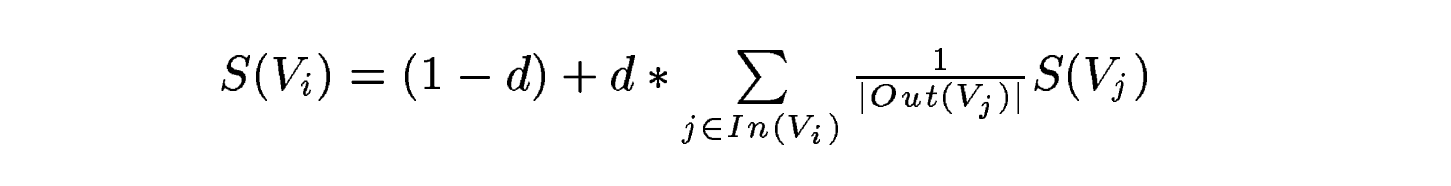

Keterangan:

    S (Vi)  : Score yang dimiliki verteks Vi
    d       : Damping factor (bernilai antara 0-1, tapi biasanya ditentukan sebesar 0.85)
    In(Vi)  : Himpunan verteks yang mengarah ke Vi (processor)
    Out(Vj) : Himpunan verteks yang ditunjuk oleh Vi (successor)
    S (Vj)  : Score yang dimiliki verteks Vj

## Implementasi pada Program

### Input Text

Input berupa teks dengan tipe data string

In [1]:
input_text = input('Input text:\n')

Input text:
Natural language processing, or NLP, is a type of artificial intelligence that deals with analyzing, understanding, and generating natural human languages so that computers can process written and spoken human language without using computer-driven language. Natural language processing, sometimes also called “computational linguistics,” uses both semantics and syntax to help computers understand how humans talk or write and how to derive meaning from what they say. This field combines the power of artificial intelligence and computer programming into an understanding so powerful that programs can even translate one language into another reasonably accurately. This field also includes voice recognition, the ability of a computer to understand what you say well enough to respond appropriately.


### Clean and Tokenize Text

Teks inputan akan dibersihkan dari non-printable karakter dan akan diubah ke dalam bentuk lower case.
Teks yang sudah dibersihkan akan ditokenisasi dengan bantuan fungsi yang ada pada library NLTK.

In [2]:
import string
import nltk
from nltk import word_tokenize

def clean(text):
    text = text.lower()
    printable = set(string.printable)
    text = filter(lambda x: x in printable, text)
    text = "".join(list(text))
    return text

cleaned_text = clean(input_text)
text = word_tokenize(cleaned_text)

print ("Tokenized Text: \n")
print (text)

Tokenized Text: 

['natural', 'language', 'processing', ',', 'or', 'nlp', ',', 'is', 'a', 'type', 'of', 'artificial', 'intelligence', 'that', 'deals', 'with', 'analyzing', ',', 'understanding', ',', 'and', 'generating', 'natural', 'human', 'languages', 'so', 'that', 'computers', 'can', 'process', 'written', 'and', 'spoken', 'human', 'language', 'without', 'using', 'computer-driven', 'language', '.', 'natural', 'language', 'processing', ',', 'sometimes', 'also', 'called', 'computational', 'linguistics', ',', 'uses', 'both', 'semantics', 'and', 'syntax', 'to', 'help', 'computers', 'understand', 'how', 'humans', 'talk', 'or', 'write', 'and', 'how', 'to', 'derive', 'meaning', 'from', 'what', 'they', 'say', '.', 'this', 'field', 'combines', 'the', 'power', 'of', 'artificial', 'intelligence', 'and', 'computer', 'programming', 'into', 'an', 'understanding', 'so', 'powerful', 'that', 'programs', 'can', 'even', 'translate', 'one', 'language', 'into', 'another', 'reasonably', 'accurately', '.', 

### Normalize the Tokenized Text with Lemmatization

##### Part of Speech (POS) Tagging
Memberi tanda (tag) pada teks yang sudah ditokenisasi dengan menggunakan Part of Speech (POS) tagging.
Pada tahap ini kita juga menggunakan fungsi yang ada pada library NLTK.

In [3]:
nltk.download('averaged_perceptron_tagger')
pos_tag = nltk.pos_tag(text)

print ("Tokenized Text with POS tags: \n")
print (pos_tag)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\A S U S\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Tokenized Text with POS tags: 

[('natural', 'JJ'), ('language', 'NN'), ('processing', 'NN'), (',', ','), ('or', 'CC'), ('nlp', 'NN'), (',', ','), ('is', 'VBZ'), ('a', 'DT'), ('type', 'NN'), ('of', 'IN'), ('artificial', 'JJ'), ('intelligence', 'NN'), ('that', 'IN'), ('deals', 'NNS'), ('with', 'IN'), ('analyzing', 'VBG'), (',', ','), ('understanding', 'NN'), (',', ','), ('and', 'CC'), ('generating', 'VBG'), ('natural', 'JJ'), ('human', 'JJ'), ('languages', 'NNS'), ('so', 'RB'), ('that', 'IN'), ('computers', 'NNS'), ('can', 'MD'), ('process', 'VB'), ('written', 'VBN'), ('and', 'CC'), ('spoken', 'VBN'), ('human', 'JJ'), ('language', 'NN'), ('without', 'IN'), ('using', 'VBG'), ('computer-driven', 'JJ'), ('language', 'NN'), ('.', '.'), ('natural', 'JJ'), ('language', 'NN'), ('processing', 'NN'), (',', ','), ('sometimes', 'RB'), ('also', 'RB'), ('called', 'VBD'), ('computational', 'JJ'), ('linguistics', 'NNS'), (',', ','), ('uses', 'VBZ'), ('both', 'DT'), ('semantics', 'NNS'), ('and', 'CC'),

##### Lemmatization
Lemmatization dilakukan untuk menormalisasi tokenized text, terutama pada kata benda (noun) dan kata sifat (adjectives).
Pada tahap ini kita juga menggunakan fungsi yang ada pada library NLTK.

In [4]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()
adjective_tags = ['JJ','JJR','JJS']
lemmatized_text = []

for word in pos_tag:
    if word[1] in adjective_tags:
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(word[0],pos="a")))
    else:
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(word[0]))) #default POS (noun)
        
print ("Text tokens after lemmatization of adjectives and nouns: \n")
print (lemmatized_text)

[nltk_data] Downloading package wordnet to C:\Users\A S U
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text tokens after lemmatization of adjectives and nouns: 

['natural', 'language', 'processing', ',', 'or', 'nlp', ',', 'is', 'a', 'type', 'of', 'artificial', 'intelligence', 'that', 'deal', 'with', 'analyzing', ',', 'understanding', ',', 'and', 'generating', 'natural', 'human', 'language', 'so', 'that', 'computer', 'can', 'process', 'written', 'and', 'spoken', 'human', 'language', 'without', 'using', 'computer-driven', 'language', '.', 'natural', 'language', 'processing', ',', 'sometimes', 'also', 'called', 'computational', 'linguistics', ',', 'us', 'both', 'semantics', 'and', 'syntax', 'to', 'help', 'computer', 'understand', 'how', 'humans', 'talk', 'or', 'write', 'and', 'how', 'to', 'derive', 'meaning', 'from', 'what', 'they', 'say', '.', 'this', 'field', 'combine', 'the', 'power', 'of', 'artificial', 'intelligence', 'and', 'computer', 'programming', 'into', 'an', 'understanding', 'so', 'powerful', 'that', 'program', 'can', 'even', 'translate', 'one', 'language', 'into', 'another', 

##### Part of Speech (POS) Tagging After Lemmatization
Memberi tanda (tag) pada teks lagi untuk mempermudah tahap selanjutnya (filtering)

In [5]:
pos_tag = nltk.pos_tag(lemmatized_text)

print ("Lemmatized text with POS tags: \n")
print (pos_tag)

Lemmatized text with POS tags: 

[('natural', 'JJ'), ('language', 'NN'), ('processing', 'NN'), (',', ','), ('or', 'CC'), ('nlp', 'NN'), (',', ','), ('is', 'VBZ'), ('a', 'DT'), ('type', 'NN'), ('of', 'IN'), ('artificial', 'JJ'), ('intelligence', 'NN'), ('that', 'WDT'), ('deal', 'NN'), ('with', 'IN'), ('analyzing', 'VBG'), (',', ','), ('understanding', 'NN'), (',', ','), ('and', 'CC'), ('generating', 'VBG'), ('natural', 'JJ'), ('human', 'JJ'), ('language', 'NN'), ('so', 'RB'), ('that', 'IN'), ('computer', 'NN'), ('can', 'MD'), ('process', 'VB'), ('written', 'VBN'), ('and', 'CC'), ('spoken', 'VBN'), ('human', 'JJ'), ('language', 'NN'), ('without', 'IN'), ('using', 'VBG'), ('computer-driven', 'JJ'), ('language', 'NN'), ('.', '.'), ('natural', 'JJ'), ('language', 'NN'), ('processing', 'NN'), (',', ','), ('sometimes', 'RB'), ('also', 'RB'), ('called', 'VBD'), ('computational', 'JJ'), ('linguistics', 'NNS'), (',', ','), ('us', 'PRP'), ('both', 'DT'), ('semantics', 'NNS'), ('and', 'CC'), ('syn

### Text Filtering

##### Define The Stopword
Stopword yang digunakan terdiri dari tiga jenis, yaitu:

    - Stopword collection dari library NLTK
    - Punctuation collection (tanda baca)
    - Kata selain noun, adjective, dan gerund (karena keyword biasanya hanya terdiri dari kata itu saja)

In [6]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_file = list(set(stopwords.words("english")))
punctuations = list(str(string.punctuation))
stopwords = []

wanted_pos = ['NN','NNS','NNP','NNPS','JJ','JJR','JJS','VBG','FW'] 
for word in pos_tag:
    if word[1] not in wanted_pos:
        stopwords.append(word[0])

stopwords = stopwords + stopwords_file + punctuations

print ("List of stopwords: \n")
print(stopwords)

List of stopwords: 

[',', 'or', ',', 'is', 'a', 'of', 'that', 'with', ',', ',', 'and', 'so', 'that', 'can', 'process', 'written', 'and', 'spoken', 'without', '.', ',', 'sometimes', 'also', 'called', ',', 'us', 'both', 'and', 'to', 'help', 'understand', 'how', 'or', 'and', 'how', 'to', 'derive', 'from', 'what', 'they', 'say', '.', 'this', 'combine', 'the', 'of', 'and', 'into', 'an', 'so', 'that', 'can', 'even', 'translate', 'one', 'into', 'another', 'reasonably', 'accurately', '.', 'this', 'also', 'includes', ',', 'the', 'of', 'a', 'to', 'understand', 'what', 'you', 'say', 'well', 'enough', 'to', 'respond', 'appropriately', '.', 'an', "wasn't", 'nor', 'very', "hasn't", 'but', 'being', 'ain', 'aren', "mightn't", 'your', 'has', 'few', 'couldn', 'be', 'over', 'hasn', 'what', "shan't", "couldn't", 'other', 'at', 'below', 'no', 'his', 'hers', 're', 've', 't', 'them', "that'll", 'should', 'who', "don't", "won't", 'o', 'of', 'him', 'against', 'why', "you'd", 'for', 'than', 'to', 'mightn', "sh

[nltk_data] Downloading package stopwords to C:\Users\A S U
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Removing Stopword from the Text
Menghapus berbagai stopword yang sudah didefinisikan sebelumnya dari teks

In [7]:
processed_text = []

for word in lemmatized_text:
    if word not in stopwords:
        processed_text.append(word)
        
print (processed_text)

['natural', 'language', 'processing', 'nlp', 'type', 'artificial', 'intelligence', 'deal', 'analyzing', 'understanding', 'generating', 'natural', 'human', 'language', 'computer', 'human', 'language', 'using', 'computer-driven', 'language', 'natural', 'language', 'processing', 'computational', 'linguistics', 'semantics', 'syntax', 'computer', 'humans', 'talk', 'write', 'meaning', 'field', 'power', 'artificial', 'intelligence', 'computer', 'programming', 'understanding', 'powerful', 'program', 'language', 'field', 'voice', 'recognition', 'ability', 'computer']


##### Select Only Unique Words
Men-generate vocabulary dari text berdasarkan kata yang unik saja

In [8]:
filtered_text = list(set(processed_text))
print ("Vocabularies that we have: \n")
print (filtered_text)

Vocabularies that we have: 

['write', 'meaning', 'artificial', 'computer', 'understanding', 'type', 'humans', 'nlp', 'field', 'analyzing', 'deal', 'linguistics', 'semantics', 'human', 'language', 'voice', 'recognition', 'power', 'talk', 'natural', 'computer-driven', 'processing', 'intelligence', 'computational', 'using', 'generating', 'ability', 'powerful', 'syntax', 'programming', 'program']


### Building Graph

Seperti yang sudah dijelaskan di awal bahwa Text Rank erupakan Graph-based model, maka kita perlu membuat graph. Dalam graph, verteks adalah setiap kata yang ada pada vocabulary.

Antar kata akan memiliki koneksi jika kata-kata tersebut terjadi bersama dalam 'window' tertentu dari list processed_text.

In [9]:
import numpy as np
import math

vocab_len = len(filtered_text)

# Matriks yang berisi informasi tentang bobot koneksi antar verteks
weighted_edge = np.zeros((vocab_len,vocab_len), dtype = np.float32)

# Matriks untuk menyimpan score yang terkait dengan setiap verteks
score = np.zeros((vocab_len), dtype = np.float32)

# Menetapkan ukuran window (dianjurkan antara 2-10)
window_size = 3

# List pair of absolute position, ditetapkan agar dua kata sama di posisi yang sama tidak dihitung berulang kali
covered_coocurrences = []

for i in range(0,vocab_len):
    score[i]=1  # Inisiasi score bernilai 1
    for j in range(0,vocab_len):
        if j==i:
            weighted_edge[i][j]=0  # Tidak ada koneksi antar verteks
        else:
            for window_start in range(0,(len(processed_text)-window_size)):
                window_end = window_start+window_size
                window = processed_text[window_start:window_end]
                
                if (filtered_text[i] in window) and (filtered_text[j] in window):
                    index_of_i = window_start + window.index(filtered_text[i])  # absolute position indeks i di window
                    index_of_j = window_start + window.index(filtered_text[j])  # absolute position indeks j di window
                    
                    if [index_of_i,index_of_j] not in covered_coocurrences:
                        weighted_edge[i][j]+=1/math.fabs(index_of_i-index_of_j)
                        covered_coocurrences.append([index_of_i,index_of_j])

Menghitung total bobot koneksi yang dimiliki setiap vertex

In [10]:
# Akan berisi jumlah koneksi yang dimiliki verteks i
inout = np.zeros((vocab_len),dtype=np.float32)

for i in range(0,vocab_len):
    for j in range(0,vocab_len):
        inout[i]+=weighted_edge[i][j]

### Scoring Vertices

Pada bagian ini kita menerapkan persamaan untuk mencari score yang dimiliki verteks Vi yang telah didefinisikan di awal.

Score akan otomatis terupdate hingga konvergen.

In [11]:
max_itteration = 50
d = 0.85
threshold = 0.0001  # Threshold konvergensi

for iter in range(0, max_itteration):
    prev_score = np.copy(score)
    
    for i in range(0, vocab_len):
        
        summation = 0
        for j in range(0,vocab_len):
            if weighted_edge[i][j] != 0:
                summation += (weighted_edge[i][j]/inout[j])*score[j]
                
        score[i] = (1-d) + d*(summation)
    
    if np.sum(np.fabs(prev_score-score)) <= threshold:
        print("Converging at iteration "+str(iter))
        break

Converging at iteration 30


In [12]:
print("Score of each vaocabulary: \n")
for i in range(0,vocab_len):
    print(filtered_text[i]+": "+str(score[i]))

Score of each vaocabulary: 

write: 0.82520616
meaning: 0.8129959
artificial: 1.3515391
computer: 1.9051017
understanding: 1.3495038
type: 0.72945595
humans: 0.7867813
nlp: 0.7153605
field: 1.459282
analyzing: 0.7453618
deal: 0.74256426
linguistics: 0.78515744
semantics: 0.7880999
human: 1.1917291
language: 3.1989732
voice: 0.8705187
recognition: 0.81118476
power: 0.7584014
talk: 0.81186736
natural: 1.4642541
computer-driven: 0.67044556
processing: 1.2744619
intelligence: 1.3415576
computational: 0.74705535
using: 0.6715671
generating: 0.69713557
ability: 0.5491263
powerful: 0.72964436
syntax: 0.7759126
programming: 0.71949923
program: 0.72048384


### Generate Keyphrases Candidate 

Membuat sekumpulan frasa yang akan dijadikan sebagai kandidat keyword

##### Phrases Partitioning
Phrase partitioning dilakukan di list lemmatized_text menggunakan stopword yang sudah didefinisikan di awal sebagai pembatasnya.

In [13]:
phrases = []

phrase = " "
for word in lemmatized_text:
    
    if word in stopwords:
        if phrase!= " ":
            phrases.append(str(phrase).strip().split())
        phrase = " "
    elif word not in stopwords:
        phrase+=str(word)
        phrase+=" "

print("Partitioned Phrases (Candidate Keyphrases): \n")
print(phrases)

Partitioned Phrases (Candidate Keyphrases): 

[['natural', 'language', 'processing'], ['nlp'], ['type'], ['artificial', 'intelligence'], ['deal'], ['analyzing'], ['understanding'], ['generating', 'natural', 'human', 'language'], ['computer'], ['human', 'language'], ['using', 'computer-driven', 'language'], ['natural', 'language', 'processing'], ['computational', 'linguistics'], ['semantics'], ['syntax'], ['computer'], ['humans', 'talk'], ['write'], ['meaning'], ['field'], ['power'], ['artificial', 'intelligence'], ['computer', 'programming'], ['understanding'], ['powerful'], ['program'], ['language'], ['field'], ['voice', 'recognition'], ['ability'], ['computer']]


##### Unique Phrases
Mengeliminasi frasa yang diulang agar semua frasa yang terbentuk unik

In [14]:
unique_phrases = []

for phrase in phrases:
    if phrase not in unique_phrases:
        unique_phrases.append(phrase)

print("Unique Phrases (Candidate Keyphrases): \n")
print(unique_phrases)

Unique Phrases (Candidate Keyphrases): 

[['natural', 'language', 'processing'], ['nlp'], ['type'], ['artificial', 'intelligence'], ['deal'], ['analyzing'], ['understanding'], ['generating', 'natural', 'human', 'language'], ['computer'], ['human', 'language'], ['using', 'computer-driven', 'language'], ['computational', 'linguistics'], ['semantics'], ['syntax'], ['humans', 'talk'], ['write'], ['meaning'], ['field'], ['power'], ['computer', 'programming'], ['powerful'], ['program'], ['language'], ['voice', 'recognition'], ['ability']]


##### Keyphrases Candidate
Menghapus single-word frasa yang juga memiliki multi-word alternatives

In [15]:
for word in filtered_text:
    for phrase in unique_phrases:
        # Frasa yang terdiri satu kata tetapi secara bersamaan juga terdapat di frasa multi-word unique_phrases sebagai single-word-phrase 
        if (word in phrase) and ([word] in unique_phrases) and (len(phrase)>1):
             unique_phrases.remove([word])
            
print("Thinned Unique Phrases (Candidate Keyphrases): \n")
print(unique_phrases)

Thinned Unique Phrases (Candidate Keyphrases): 

[['natural', 'language', 'processing'], ['nlp'], ['type'], ['artificial', 'intelligence'], ['deal'], ['analyzing'], ['understanding'], ['generating', 'natural', 'human', 'language'], ['human', 'language'], ['using', 'computer-driven', 'language'], ['computational', 'linguistics'], ['semantics'], ['syntax'], ['humans', 'talk'], ['write'], ['meaning'], ['field'], ['power'], ['computer', 'programming'], ['powerful'], ['program'], ['voice', 'recognition'], ['ability']]


### Scoring Keyphrases

Scoring frasa dilakukan dengan menambahkan score setiap word yang menyusunnya (score yang sebelumnya sudah dihitung saat melakukan scoring vertices).

In [16]:
phrase_scores = []
keywords = []
for phrase in unique_phrases:
    phrase_score=0
    keyword = ''
    for word in phrase:
        keyword += str(word)
        keyword += " "
        phrase_score+=score[filtered_text.index(word)]
    phrase_scores.append(phrase_score)
    keywords.append(keyword.strip())

i=0
for keyword in keywords:
    print ("'"+str(keyword)+"' : "+str(phrase_scores[i]))
    i+=1

'natural language processing' : 5.937689185142517
'nlp' : 0.7153605222702026
'type' : 0.7294559478759766
'artificial intelligence' : 2.6930967569351196
'deal' : 0.7425642609596252
'analyzing' : 0.7453618049621582
'understanding' : 1.349503755569458
'generating natural human language' : 6.552091956138611
'human language' : 4.390702247619629
'using computer-driven language' : 4.540985822677612
'computational linguistics' : 1.5322127938270569
'semantics' : 0.7880998849868774
'syntax' : 0.7759125828742981
'humans talk' : 1.5986486673355103
'write' : 0.8252061605453491
'meaning' : 0.8129959106445312
'field' : 1.4592820405960083
'power' : 0.7584013938903809
'computer programming' : 2.624600887298584
'powerful' : 0.7296443581581116
'program' : 0.7204838395118713
'voice recognition' : 1.6817034482955933
'ability' : 0.5491263270378113


### Ranking Keyphrases

Mengurutkan Keyphrases dari score yang paling tinggi ke paling rendah untuk ditampilkan sebagai hasil ekstraksi keyword

In [17]:
sorted_index = np.flip(np.argsort(phrase_scores),0)

max_keywords = 10

print("Keywords:\n")

for i in range(0, max_keywords):
    print("{}. ".format(i+1) + str(keywords[sorted_index[i]]))

Keywords:

1. generating natural human language
2. natural language processing
3. using computer-driven language
4. human language
5. artificial intelligence
6. computer programming
7. voice recognition
8. humans talk
9. computational linguistics
10. field
